******************************************************************
* <b>Author:</b>- Sunil Sharanappa
* <b>Linked in:</b>- https://www.linkedin.com/in/sunil-sharanappa/
* <b>Refered materials:</b>- Krish Naik,Satyam Kumar blog,SK learn Library
******************************************************************

# <b>Types of Cross Validations</b>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
df=pd.read_csv('/content/cancer_dataset.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df['diagnosis'].value_counts()
df['diagnosis']=df.diagnosis.replace({"B": 0,"M":1})

# Dividing in to Independent & Dependent variables 
X=df.iloc[:,2:]
y=df.iloc[:,1]

X=X.dropna(axis=1)

### <b>1.HoldOut Validation Approach- Train And Test Split:</b>

* In this method, Dataset is randomly split into train and test data. split of training data is generally more than test data. The training data is used to induce the model and validation data is evaluates the performance of the model.

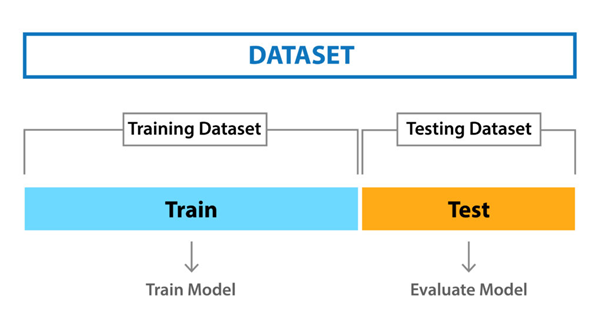

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Test and Train will be split as 30% & 70% Respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print(result)

0.9005847953216374


### <b>2.K Fold Cross Validation</b>

* In k-fold cross-validation, the original dataset is equally partitioned into k subparts or folds.

* Out of the k-folds or groups, for each iteration, one group is selected as validation data, and the remaining (k-1) groups are selected as training data.

* The process is repeated for k times until each group is treated as validation and remaining as training data.

* The final accuracy of the model is computed by taking the <b>Mean accuracy</b> of the k-models validation data.

* <b>Finaly Accuracy=<br>
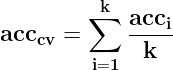

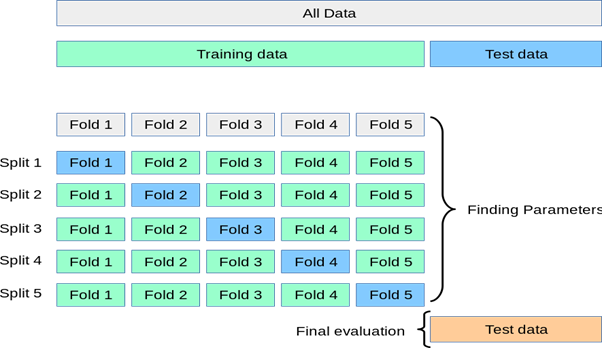


<b>Pros:</b>1.The model has low bias. 2.The entire dataset is utilized for both training and validation.

<b>Cons:</b>
Not suitable for an imbalanced dataset.


#### <b><u>K FOLD:-</u> Applying Kfold Using Single Modal(Decision Tree)</b>

In [ ]:
model=DecisionTreeClassifier()
kfold_validation=KFold(10)

from sklearn.model_selection import cross_val_score
results=cross_val_score(model,X,y,cv=kfold_validation)
print(results)
print("Best Mean Accuracy:- ",np.mean(results))

[0.96491228 0.9122807  0.89473684 0.94736842 0.92982456 0.96491228
 0.9122807  0.96491228 0.96491228 0.89285714]
Best Mean Accuracy:-  0.9348997493734336


#### <b><u>K FOLD:-</u> Applying Kfold On Multiple Modals</b>

In [ ]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold=KFold(10,shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.950815 (0.025751)
LDA: 0.956078 (0.021100)
KNN: 0.938440 (0.024039)
CART: 0.919079 (0.038040)
NB: 0.938503 (0.026286)
SVM: 0.627475 (0.073226)


### <b>3.Stratified K-fold Cross Validation</b>

*	Stratified k-fold cross-validation works well for an <b>imbalanced dataset</b>.

*	In Stratified k-fold cross-validation, the dataset is partitioned into k groups or folds such that the validation data/Test set has an equal number of instances of target class label. 

*	This ensures that one particular class is not over present in the validation or train data especially when the dataset is imbalanced.

* The final score is computed by taking the mean of scores of each fold.

<b>Pros:</b>Works well for an imbalanced dataset.

<b>Cons:</b>Not suitable for time series dataset.


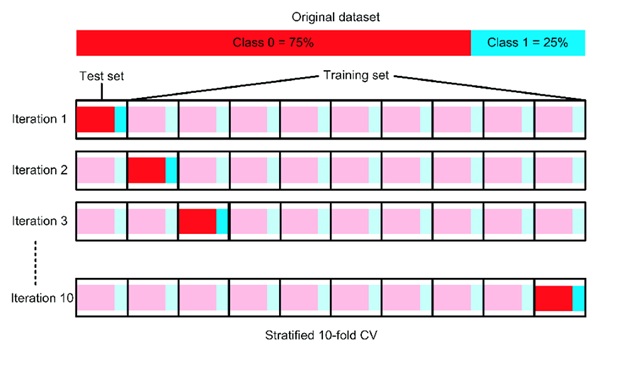

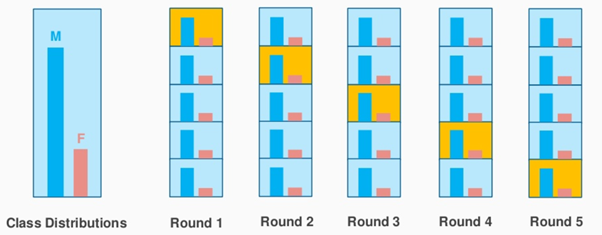

#### <b><u>Stratified K FOLD:-</u> Applying Stratified Kfold Using Single Modal(Decision Tree)</b>

In [ ]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=10)
model=DecisionTreeClassifier()
scores=cross_val_score(model,X,y,cv=skfold)
print(np.mean(scores))

0.9156954887218044


#### <b><u>Stratified K FOLD:-</u> Applying Stratified Kfold On Multiple Modals</b>

In [ ]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in terms of Accuracy
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.954323 (0.016039)
LDA: 0.956078 (0.016142)
KNN: 0.936779 (0.028444)
DTC: 0.915695 (0.031093)
NB: 0.938503 (0.029591)
SVM: 0.627412 (0.006966)


### <b>4.Leave One Out Cross Validation(LOOCV)</b>

* Leave-one-out cross-validation (LOOCV) is an exhaustive cross-validation technique. It is a category of LpOCV with the case of p=1.

*	For a dataset having n rows, 1st row is selected for validation, and the rest (n-1) rows are used to train the model.

* For the next iteration, the 2nd row is selected for validation and rest to train the model. Similarly, the process is repeated until n steps or the desired number of operations.

*	Exhaustive cross-validation methods are cross-validation methods that learn and test in all possible ways.

<b>Pros:</b>
1.	Simple, easy to understand, and implement.

<b>Cons:</b>
1.	The model may lead to a low bias.
2.	The computation time required is high.

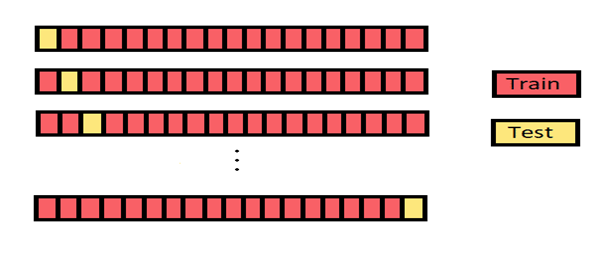

#### <b><u>Leave One Out Cross Validation:-</u> Applying Leave One Out Cross Validation Using Single Modal(Decision Tree)</b>

In [ ]:
from sklearn.model_selection import LeaveOneOut
from numpy import std
from numpy import absolute
from numpy import mean
model=DecisionTreeClassifier()
leave_validation=LeaveOneOut()
results=cross_val_score(model,X,y,cv=leave_validation)
#results.mean()
scores = absolute(results)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.926 (0.261)


#### <b><u>Leave One Out Cross Validation:-</u> Applying Leave One Out Cross Validation Using Mulitple Modal</b>

In [ ]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in terms of Accuracy
results = []
names = []
for name, model in models:
    leave_validation=LeaveOneOut()  
    cv_results = cross_val_score(model, X, y, cv=leave_validation, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.950791 (0.216304)
LDA: 0.957821 (0.200998)
KNN: 0.933216 (0.249647)
DTC: 0.933216 (0.249647)
NB: 0.938489 (0.240266)
SVM: 0.627417 (0.483493)


### <b>5.	Repeated Random Test-Train Splits:-</b>

* Repeated random subsampling validation also referred to as Monte Carlo cross-validation splits the dataset randomly into training and validation. Unlikely k-fold cross-validation split of the dataset into not in groups or folds but splits in this case in random.

*	The number of iterations is not fixed and decided by analysis. The results are then averaged over the splits.

*	This technique is a hybrid of traditional train-test splitting and the k-fold cross-validation method.

* In this technique, we create random splits of the data in the training-test set manner and then repeat the process of splitting and evaluating the algorithm multiple times, just like the cross-validation method.

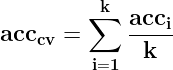

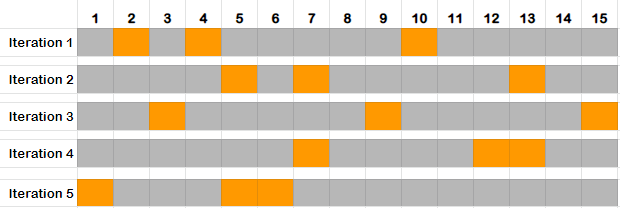


#### <b><u>Repeated Random Test-Train Splits:-</u> Applying it on Single Modal(Decision Tree)</b>

In [ ]:
from sklearn.model_selection import ShuffleSplit
model=DecisionTreeClassifier()
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
results=cross_val_score(model,X,y,cv=ssplit)
scores = absolute(results)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.915 (0.020)


#### <b><u>Repeated Random Test-Train Splits:-</u> Applying it on Multiple Modal(Decision Tree)</b>

In [ ]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in terms of Accuracy
results = []
names = []
for name, model in models:
    ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
    cv_results = cross_val_score(model, X, y, cv=ssplit, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.946199 (0.011340)
LDA: 0.963158 (0.016959)
KNN: 0.929240 (0.018576)
DTC: 0.922807 (0.015428)
NB: 0.939181 (0.012597)
SVM: 0.640936 (0.032686)


### <b>6. Time Series cross-validation:-</b>

* The order of the data is very important for time-series related problem. For time-related dataset random split or k-fold split of data into train and validation may not yield good results.

* For the time-series dataset, the split of data into train and validation is according to the time also referred to as <b>forward chaining method or rolling cross-validation</b>. 

* For a particular iteration, the next instance of train data can be treated as <b>validation data</b>.

* As mentioned in the below diagram, for the 1st iteration, 1st 3 rows are considered as train data and the next instance T4 is validation data. The chance of choice of train and validation data is forwarded for further iterations.

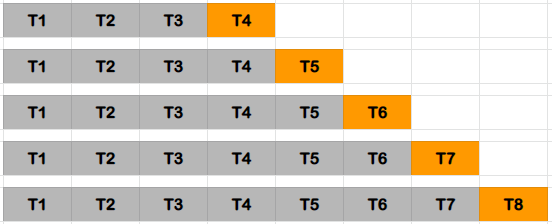




In [ ]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])
tscv = TimeSeriesSplit()
print(tscv)
for train_index, test_index in tscv.split(X):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]


TimeSeriesSplit(max_train_size=None, n_splits=5)
TRAIN: [0] TEST: [1]
TRAIN: [0 1] TEST: [2]
TRAIN: [0 1 2] TEST: [3]
TRAIN: [0 1 2 3] TEST: [4]
TRAIN: [0 1 2 3 4] TEST: [5]


### <b>7.Leave p-out cross-validation:</b>

* Leave p-out cross-validation (LpOCV) is an exhaustive cross-validation technique, that involves using p-observation as validation data, and remaining data is used to train the model.

* This is repeated in all ways to cut the original sample on a validation set of p observations and a training set.

* A variant of LpOCV with p=2 known as leave-pair-out cross-validation has been recommended as a nearly unbiased method for estimating the area under ROC curve of a binary classifier.

* A particular case of this method is when p = 1. This is known as Leave one out cross validation

In [ ]:
from sklearn.model_selection import LeavePOut
from numpy import std
from numpy import absolute
from numpy import mean
model=GaussianNB()
lpo=LeavePOut(2)
results=cross_val_score(model,X,y,cv=lpo)
scores = absolute(results)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.938 (0.240)


In [ ]:
import numpy as np
from sklearn.model_selection import LeavePOut
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8],[9,10]])
y = np.array([1, 2, 3, 4,5])
lpo = LeavePOut(2)
print("number of splits:- ",lpo.get_n_splits(X))
print(lpo)
i=0
for train_index, test_index in lpo.split(X):
  #print("\n TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  i=i+1
  print("****************************SPLIT",i,"***********************************************************")
  print("TRAIN:", train_index, "TEST:", test_index,"\n X_train value is:- \n",X_train,"\n Xtest value is:- \n",X_test)

number of splits:-  10
LeavePOut(p=2)
****************************SPLIT 1 ***********************************************************
TRAIN: [2 3 4] TEST: [0 1] 
 X_train value is:- 
 [[ 5  6]
 [ 7  8]
 [ 9 10]] 
 Xtest value is:- 
 [[1 2]
 [3 4]]
****************************SPLIT 2 ***********************************************************
TRAIN: [1 3 4] TEST: [0 2] 
 X_train value is:- 
 [[ 3  4]
 [ 7  8]
 [ 9 10]] 
 Xtest value is:- 
 [[1 2]
 [5 6]]
****************************SPLIT 3 ***********************************************************
TRAIN: [1 2 4] TEST: [0 3] 
 X_train value is:- 
 [[ 3  4]
 [ 5  6]
 [ 9 10]] 
 Xtest value is:- 
 [[1 2]
 [7 8]]
****************************SPLIT 4 ***********************************************************
TRAIN: [1 2 3] TEST: [0 4] 
 X_train value is:- 
 [[3 4]
 [5 6]
 [7 8]] 
 Xtest value is:- 
 [[ 1  2]
 [ 9 10]]
****************************SPLIT 5 ***********************************************************
TRAIN: [0 3 4] TEST: [1 2] 
